In [348]:
import os
import torch
import gc
import logging

gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()        
    torch.cuda.ipc_collect()


try:
    %run setup_paths
except:
    %run notebooks/setup_paths
    

logging.basicConfig(
    level=logging.INFO,  # or DEBUG, WARNING, etc.
    format='%(asctime)s - %(levelname)s - %(message)s',
    stream=sys.stdout
)

logging.info(f"current dir: {os.getcwd()}")

2025-08-22 08:50:38,860 - INFO - current dir: c:\Projects\scmsim


## Fetch and observe the data
- After it was generated CausalSim.MovieLens1M.0.MF40 was added to configs/config.yaml
- The .0 - is because it was trained on the sample-set 0

In [366]:
%run src/utils
%run src/loaders

cfg = read_cfg('configs/config.yaml')
paths = PathProvider(cfg['paths']['results'], cfg['paths']['products'])
uidata = MovieLensData(get_uidata_loader(cfg, 'CausalSim.MovieLens1M.0.MF40'))
uidata.ratings

2025-08-22 08:59:29,084 - INFO - loading ratings


,user_id,item_id,watched,timestamp
0,1,1,1.0,0.158135
1,1,34,1.0,0.953114
2,1,57,1.0,1.175028
3,1,268,1.0,1.789184
4,1,296,1.0,0.328906
...,...,...,...,...
1050442,6040,3819,1.0,0.142307
1050443,6040,3858,1.0,0.821029
1050444,6040,3868,1.0,0.094026
1050445,6040,3875,1.0,0.474089


## Generate estimations on top of trained models
- IPWPaeams(clipping, stabalized)
- (the last setting is stabalized with clipping=1.0 - which sets a weight of 1 to each sample.)

In [367]:

%run src/estimators
%run src/pipeline
%run src/estimators

ground_truth_name = 'CausalSim.MovieLens1M.MF40/gt.filtered.8'
ipw_params = [IPWParams(0, False), IPWParams(0, True), IPWParams(0.2, True), IPWParams(1, True),
             IPWParams(0, False, False), IPWParams(0, True,False), IPWParams(0.2, True,False), IPWParams(1, True,False)]

for model_name in ['MF30', 'MF50', 'MF60']:
    model = load_model(paths, uidata.name(), model_name)
    ipwe = MFIPWEstimator(model_name, model, ipw_params)    
    ## reset_ids mean we re-match the item-ids from the title name 
    create_estimations(paths, uidata, f'{model_name}.IPW', ground_truth_name, ipwe, reset_ids=False)
    create_estimations(paths, uidata, f'{model_name}.CosSim' , ground_truth_name, CosineSimilarityEstimator(model_name, model), reset_ids=False)
    #create_estimations(paths, uidata, f'{model_name}.Gate' , ground_truth_name, GateEstimator(model_name, model), reset_ids=False)



2025-08-22 08:59:30,001 - INFO - loading model MF30 (version 0) at results\CausalSim.MovieLens1M.0.MF40\models\MF30.0\weights.pt
2025-08-22 08:59:30,033 - INFO - processing: 0:6212 / 6212


C:\Projects\scmsim\src\loaders.py:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(model_path)


2025-08-22 08:59:32,901 - INFO - saving estimations at results\CausalSim.MovieLens1M.0.MF40\estimations\CausalSim.MovieLens1M.MF40.gt.filtered.8\MF30.IPW
2025-08-22 08:59:33,007 - INFO - processing: 0:6212 / 6212
2025-08-22 08:59:33,013 - INFO - saving estimations at results\CausalSim.MovieLens1M.0.MF40\estimations\CausalSim.MovieLens1M.MF40.gt.filtered.8\MF30.CosSim
2025-08-22 08:59:33,034 - INFO - loading model MF50 (version 0) at results\CausalSim.MovieLens1M.0.MF40\models\MF50.0\weights.pt
2025-08-22 08:59:33,068 - INFO - processing: 0:6212 / 6212


C:\Projects\scmsim\src\loaders.py:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(model_path)


2025-08-22 08:59:35,998 - INFO - saving estimations at results\CausalSim.MovieLens1M.0.MF40\estimations\CausalSim.MovieLens1M.MF40.gt.filtered.8\MF50.IPW
2025-08-22 08:59:36,111 - INFO - processing: 0:6212 / 6212
2025-08-22 08:59:36,238 - INFO - saving estimations at results\CausalSim.MovieLens1M.0.MF40\estimations\CausalSim.MovieLens1M.MF40.gt.filtered.8\MF50.CosSim
2025-08-22 08:59:36,261 - INFO - loading model MF60 (version 0) at results\CausalSim.MovieLens1M.0.MF40\models\MF60.0\weights.pt
2025-08-22 08:59:36,382 - INFO - processing: 0:6212 / 6212


C:\Projects\scmsim\src\loaders.py:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(model_path)


2025-08-22 08:59:39,232 - INFO - saving estimations at results\CausalSim.MovieLens1M.0.MF40\estimations\CausalSim.MovieLens1M.MF40.gt.filtered.8\MF60.IPW
2025-08-22 08:59:39,329 - INFO - processing: 0:6212 / 6212
2025-08-22 08:59:39,333 - INFO - saving estimations at results\CausalSim.MovieLens1M.0.MF40\estimations\CausalSim.MovieLens1M.MF40.gt.filtered.8\MF60.CosSim


## Generate basic estimations

In [368]:
basee = BasicEstimator()
create_estimations(paths, uidata, 'Basic' , ground_truth_name, basee)


2025-08-22 08:59:39,398 - INFO - processing: 0:6212 / 6212
2025-08-22 08:59:40,238 - INFO - saving estimations at results\CausalSim.MovieLens1M.0.MF40\estimations\CausalSim.MovieLens1M.MF40.gt.filtered.8\Basic


,CORR,LIFT,SATE,treatment_idx,resp_idx
0,-0.027446,2.415570,0.049250,1254,1515
1,0.338245,3.062363,0.066917,166,1515
2,-0.070136,1.330297,0.164616,1254,648
3,0.437892,1.382588,0.285350,1197,648
4,0.040429,1.952166,0.472681,376,648
...,...,...,...,...,...
6207,-0.137752,1.780210,0.337812,707,1198
6208,-0.287164,2.185692,0.054795,1213,1753
6209,0.008464,1.985557,0.163326,1114,292
6210,-0.075240,1.746397,0.071957,695,7


In [369]:
## Use ground-truth propensity

In [370]:
for model_name in ['MF40']:
    model = load_model(paths, 'MovieLens1M', model_name)
    ipwe = MFIPWEstimator("gt", model, ipw_params)    
    ## reset_ids mean we re-match the item-ids from the title name 
    create_estimations(paths, uidata, f'{model_name}.IPW', ground_truth_name, ipwe, reset_ids=False)
    #create_estimations(paths, uidata, f'{model_name}.CosSim' , ground_truth_name, CosineSimilarityEstimator(model_name, model), reset_ids=False)


2025-08-22 08:59:40,319 - INFO - loading model MF40 (version 0) at results\MovieLens1M\models\MF40.0\weights.pt
2025-08-22 08:59:40,434 - INFO - processing: 0:6212 / 6212


C:\Projects\scmsim\src\loaders.py:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(model_path)


2025-08-22 08:59:43,246 - INFO - saving estimations at results\CausalSim.MovieLens1M.0.MF40\estimations\CausalSim.MovieLens1M.MF40.gt.filtered.8\MF40.IPW


## Method Comparison
- MF30.IPW - is regular IPW on top of MF30 model
- MF30.IPW.s - is stabilized IPW on top of MF30 model
- MF60.IPWs.clp0.2.s is stabilized IPW with clipping=0.2 on top of MF60 model

In [371]:
%run src/pipeline
get_sim_scores(paths, uidata, ground_truth_name)

,name,mse,corr,mse_pos,mse_zero
0,CORR,"tensor(0.0283, dtype=torch.float64)",0.307178,"tensor(0.0208, dtype=torch.float64)","tensor(0.0289, dtype=torch.float64)"
1,LIFT,"tensor(10.6384, dtype=torch.float64)",0.424369,"tensor(52.0180, dtype=torch.float64)","tensor(7.9794, dtype=torch.float64)"
2,SATE,"tensor(0.0469, dtype=torch.float64)",0.332264,"tensor(0.0515, dtype=torch.float64)","tensor(0.0460, dtype=torch.float64)"
3,MF30.CosSim,"tensor(0.0546, dtype=torch.float64)",0.439403,"tensor(0.1413, dtype=torch.float64)","tensor(0.0466, dtype=torch.float64)"
4,MF30.IPW.t,"tensor(0.3727, dtype=torch.float64)",-0.001659,"tensor(0.5843, dtype=torch.float64)","tensor(0.2763, dtype=torch.float64)"
5,MF30.IPW.s.t,"tensor(0.0410, dtype=torch.float64)",0.189762,"tensor(0.0699, dtype=torch.float64)","tensor(0.0378, dtype=torch.float64)"
6,MF30.IPW.clp0.2.s.t,"tensor(0.0158, dtype=torch.float64)",0.312508,"tensor(0.0182, dtype=torch.float64)","tensor(0.0154, dtype=torch.float64)"
7,MF30.IPW.clp1.s.t,"tensor(0.0117, dtype=torch.float64)",0.364362,"tensor(0.0098, dtype=torch.float64)","tensor(0.0115, dtype=torch.float64)"
8,MF30.IPW,"tensor(0.0041, dtype=torch.float64)",0.412959,"tensor(0.0075, dtype=torch.float64)","tensor(0.0040, dtype=torch.float64)"
9,MF30.IPW.s,"tensor(0.0060, dtype=torch.float64)",0.414381,"tensor(0.0041, dtype=torch.float64)","tensor(0.0063, dtype=torch.float64)"


In [372]:
%run src/pipeline
cdf, _ = get_enriched_estimates(paths, uidata, ground_truth_name)
cdf.sort_values(by="ate", ascending=False)

,idx,treatment_title,resp_title,sate,causal_effect,explanation,treatment_idx,resp_idx,ate,CORR,...,MF50.IPW.clp1.s,MF60.CosSim,MF60.IPW.t,MF60.IPW.s.t,MF60.IPW.clp0.2.s.t,MF60.IPW.clp1.s.t,MF60.IPW,MF60.IPW.s,MF60.IPW.clp0.2.s,MF60.IPW.clp1.s
2024,5549,Flipper (1996),Free Willy 3: The Rescue (1997),-0.124615,5,Both are family-friendly films centered on aqu...,711,1595,0.448841,0.669923,...,0.401489,0.584166,0.121457,0.252266,0.329968,0.326919,0.129894,0.263569,0.389707,0.401489
7373,5733,Halloween: The Curse of Michael Myers (1995),Amityville 3-D (1983),0.247588,5,Both are part of long-running horror film fran...,891,1323,0.439404,0.632181,...,0.511614,0.931468,-0.114298,0.076827,0.418371,0.467511,0.098568,0.260367,0.456356,0.511614
6965,3929,Hellraiser: Bloodline (1996),Candyman: Farewell to the Flesh (1995),-0.015300,5,Both are sequels to popular 90s supernatural h...,611,606,0.424007,0.486523,...,0.569223,0.750493,-0.073785,0.168564,0.422589,0.434842,0.076646,0.320964,0.526024,0.569223
6893,6252,Moll Flanders (1996),Jude (1996),0.669168,4,Both are 1996 period dramas based on classic l...,650,1056,0.367053,0.630607,...,0.322555,0.660772,0.050025,0.220571,0.254737,0.275858,0.069920,0.242546,0.279006,0.322555
7520,7970,Outbreak (1995),Robert A. Heinlein's The Puppet Masters (1994),0.310014,4,Both are 90s thrillers with sci-fi/viral threa...,292,512,0.354967,0.282911,...,0.364775,0.673075,-0.045807,0.111167,0.250453,0.298342,0.165136,0.293458,0.334251,0.364775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,7997,"Spitfire Grill, The (1996)","Funeral, The (1996)",-0.112401,0,"Spitfire Grill is a small-town American drama,...",848,1114,-0.015894,-0.083499,...,0.201784,0.077215,-0.132372,-0.069197,0.072383,0.127235,-0.021753,0.053411,0.152116,0.201784
3336,4664,Sphere (1998),True Lies (1994),-0.130621,0,"Despite sharing big-budget, thriller aspects, ...",1779,380,-0.016225,0.136309,...,0.378465,0.267677,-0.826433,-0.513493,-0.340223,-0.216525,-0.082677,0.049675,0.236771,0.378465
64,133,Raising Arizona (1987),Mission: Impossible (1996),-0.410768,0,Raising Arizona is a quirky Coen Brothers' com...,1394,648,-0.020033,0.263593,...,0.236429,-0.041851,-1.548544,-0.465367,-0.235869,-0.066973,-0.015342,0.044553,0.124221,0.236429
2212,6321,That Thing You Do! (1996),Breakdown (1997),-0.118716,0,"One is a musical comedy-drama, the other a thr...",1042,1518,-0.021689,-0.001281,...,0.296199,0.128506,-0.139523,0.029194,0.122050,0.180757,-0.030438,0.116055,0.225726,0.296199


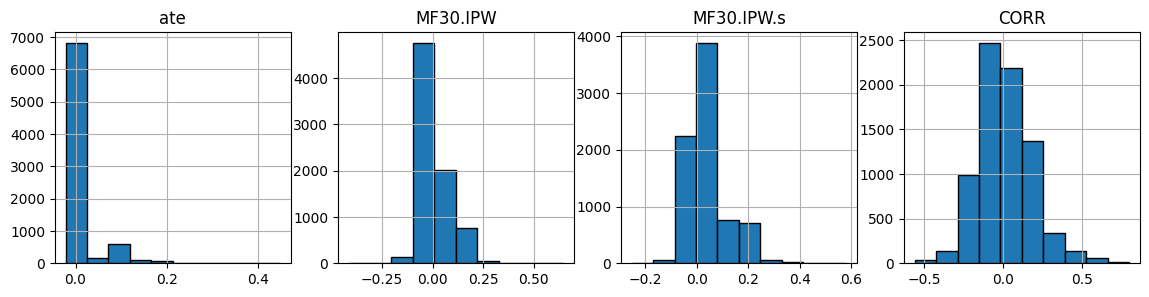

In [373]:
import matplotlib.pyplot as plt

idx = 1
plt.figure(figsize=(14, 3))
for col in ['ate','MF30.IPW', 'MF30.IPW.s', 'CORR']:
    plt.subplot(1, 4, idx)
    plt.title(col)
    cdf[col].hist(bins=10, edgecolor='black')
    idx += 1

In [374]:
cdf.sort_values(by="ate", ascending=False)[["ate","MF30.IPW","MF30.IPW.s","MF30.CosSim","gt.IPW", "gt.IPW.s","CORR"]].head(30)
#cdf[cdf["ate"] > 0.2][["ate","MF30.IPW","MF30.IPW.s","gt.IPW", "gt.IPW.s","CORR"]]

,ate,MF30.IPW,MF30.IPW.s,MF30.CosSim,gt.IPW,gt.IPW.s,CORR
2024,0.448841,0.224737,0.327001,0.390543,0.596002,0.372522,0.669923
7373,0.439404,0.308177,0.580066,0.891705,3.120990,0.711354,0.632181
6965,0.424007,0.382862,0.486402,0.615471,0.709409,0.621488,0.486523
6893,0.367053,0.146205,0.369308,0.449171,0.127212,0.283475,0.630607
7520,0.354967,0.256460,0.264928,0.553336,0.240306,0.259660,0.282911
6815,0.351821,0.269521,0.308549,0.855312,1.663231,0.390280,0.535597
1468,0.348675,0.147067,0.228865,0.534845,0.247706,0.199650,0.442961
4672,0.342053,0.384073,0.412363,0.649362,0.477633,0.411318,0.400246
7676,0.331457,0.179645,0.325875,0.754119,0.637821,0.358005,0.434568
7307,0.322351,0.278080,0.315005,0.228096,0.548799,0.259965,0.215862
